# Maximizing Revenue for Taxi Cab Drivers through Payment Type Analysis

### Problem Statement

In the fast-paced taxi booking sector, making the most of revenue is essential for long-term success and driver happiness. Our goal is to use data-driven insights to maximize revenue streams for taxi drivers in order to meet this need. Our research aims to determine whether payment methods have an impact on fare pricing by focusing on the relationship between payment type and fare amount.

### Objective

This project's main goal is to run an A/B test to examine the relationship between the total fare and the method of payment. We use Python hypothesis testing and descriptive statistics to extract useful information that can help taxi drivers generate more cash. In particular, we want to find out if there is a big difference in the fares for those who pay with credit cards versus those who pay with cash.

### Research Question

Is there a relationship between total fare amount and payment type and can we nudge customers towards payment methods that generate higher revenue for drivers, without negatively impacting customer experience?

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')

In [57]:
df = pd.read_csv(r"D:\2023_Yellow_Taxi_Trip_Data.csv")

In [58]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,01/01/2023 12:32:10 AM,01/01/2023 12:40:36 AM,1.0,0.97,1.0,N,161.0,141.0,2.0,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,01/01/2023 12:55:08 AM,01/01/2023 01:01:27 AM,1.0,1.10,1.0,N,43.0,237.0,1.0,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,01/01/2023 12:25:04 AM,01/01/2023 12:37:49 AM,1.0,2.51,1.0,N,48.0,238.0,1.0,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,01/01/2023 12:03:48 AM,01/01/2023 12:13:25 AM,0.0,1.90,1.0,N,138.0,7.0,1.0,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,01/01/2023 12:10:29 AM,01/01/2023 12:21:19 AM,1.0,1.43,1.0,N,107.0,79.0,1.0,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00


EDA

In [59]:
df.shape

(317872, 19)

In [60]:
df.dtypes

VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
RatecodeID               float64
store_and_fwd_flag        object
PULocationID             float64
DOLocationID             float64
payment_type             float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
airport_fee              float64
dtype: object

In [61]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

In [62]:
df.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                    float64
DOLocationID                    float64
payment_type                    float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
airport_fee                     float64
dtype: object

In [63]:
df['duration'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']
df['duration'] = df['duration'].dt.total_seconds() / 60


In [64]:

df = df[['passenger_count', 'payment_type', 'fare_amount', 'trip_distance', 'duration']]
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1.0,2.0,9.3,0.97,8.433333
1,1.0,1.0,7.9,1.10,6.316667
2,1.0,1.0,14.9,2.51,12.750000
3,0.0,1.0,12.1,1.90,9.616667
4,1.0,1.0,11.4,1.43,10.833333
...,...,...,...,...,...
317867,1.0,1.0,69.5,18.80,30.566667
317868,1.0,1.0,7.9,1.05,5.616667
317869,1.0,1.0,5.1,0.73,2.033333
317870,1.0,1.0,26.5,0.00,14.116667


In [65]:
df.isnull().sum()

passenger_count    1
payment_type       1
fare_amount        1
trip_distance      1
duration           0
dtype: int64

In [66]:
df = df.dropna(subset=['passenger_count', 'payment_type', 'fare_amount', 'trip_distance', 'duration'])


In [67]:
df.isnull().sum()

passenger_count    0
payment_type       0
fare_amount        0
trip_distance      0
duration           0
dtype: int64

In [68]:
df['passenger_count'] = df['passenger_count'].astype('int64')
df['payment_type'] = df['payment_type'].astype('int64')


In [69]:
df[df.duplicated()]

,passenger_count,payment_type,fare_amount,trip_distance,duration
1679,1,1,6.5,0.71,4.600000
2662,1,1,10.7,2.10,7.350000
2794,1,1,7.2,1.10,5.616667
3383,2,1,5.1,0.75,2.116667
3653,1,1,8.6,1.21,6.166667
...,...,...,...,...,...
317856,1,2,6.5,0.80,5.516667
317858,1,1,9.3,1.20,9.866667
317859,1,1,10.7,1.70,7.500000
317865,2,1,8.6,1.50,5.500000


In [70]:
df.drop_duplicates(inplace=True)

In [71]:
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,2,9.3,0.97,8.433333
1,1,1,7.9,1.10,6.316667
2,1,1,14.9,2.51,12.750000
3,0,1,12.1,1.90,9.616667
4,1,1,11.4,1.43,10.833333
...,...,...,...,...,...
317864,1,2,10.0,1.69,7.200000
317866,1,1,12.1,2.52,7.883333
317867,1,1,69.5,18.80,30.566667
317868,1,1,7.9,1.05,5.616667


In [72]:
df['passenger_count'].value_counts(normalize=True)

1    0.689280
2    0.182076
3    0.050515
4    0.032171
0    0.018471
5    0.017215
6    0.010272
Name: passenger_count, dtype: float64

In [73]:
df = df[df['payment_type'] < 3]
df = df[(df['passenger_count'] > 0) & (df['passenger_count'] < 6)]

df.shape


(270341, 5)

In [74]:
df['payment_type'].replace([1, 2], ['Card', 'Cash'], inplace=True)
df


,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,Cash,9.3,0.97,8.433333
1,1,Card,7.9,1.10,6.316667
2,1,Card,14.9,2.51,12.750000
4,1,Card,11.4,1.43,10.833333
5,1,Card,12.8,1.84,12.300000
...,...,...,...,...,...
317864,1,Cash,10.0,1.69,7.200000
317866,1,Card,12.1,2.52,7.883333
317867,1,Card,69.5,18.80,30.566667
317868,1,Card,7.9,1.05,5.616667


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 270341 entries, 0 to 317870
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   passenger_count  270341 non-null  int64  
 1   payment_type     270341 non-null  object 
 2   fare_amount      270341 non-null  float64
 3   trip_distance    270341 non-null  float64
 4   duration         270341 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 12.4+ MB


In [76]:
df.describe()

,passenger_count,fare_amount,trip_distance,duration
count,270341.000000,270341.000000,270341.000000,270341.000000
mean,1.463448,22.272672,4.672992,17.776059
std,0.876172,20.763770,121.485430,51.685925
min,1.000000,-270.320000,0.000000,0.000000
25%,1.000000,10.000000,1.240000,7.850000
50%,1.000000,14.200000,2.190000,12.816667
75%,2.000000,25.400000,4.820000,20.400000
max,5.000000,656.800000,62359.520000,2596.200000


In [77]:
df = df[df['fare_amount'] > 0]
df = df[df['trip_distance'] > 0]
df = df[df['duration'] > 0]


In [78]:
df.describe()

,passenger_count,fare_amount,trip_distance,duration
count,266781.000000,266781.000000,266781.000000,266781.000000
mean,1.463226,22.219562,4.490965,17.828158
std,0.876244,20.241849,19.519093,51.689955
min,1.000000,0.010000,0.010000,0.016667
25%,1.000000,10.000000,1.270000,7.916667
50%,1.000000,14.200000,2.200000,12.866667
75%,2.000000,25.400000,4.900000,20.433333
max,5.000000,656.800000,9680.610000,2596.200000


(array([2.44246e+05, 2.21530e+04, 2.90000e+02, 6.40000e+01, 1.30000e+01,
        9.00000e+00, 3.00000e+00, 2.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([1.00000e-02, 6.56890e+01, 1.31368e+02, 1.97047e+02, 2.62726e+02,
        3.28405e+02, 3.94084e+02, 4.59763e+02, 5.25442e+02, 5.91121e+02,
        6.56800e+02]),
 <BarContainer object of 10 artists>)

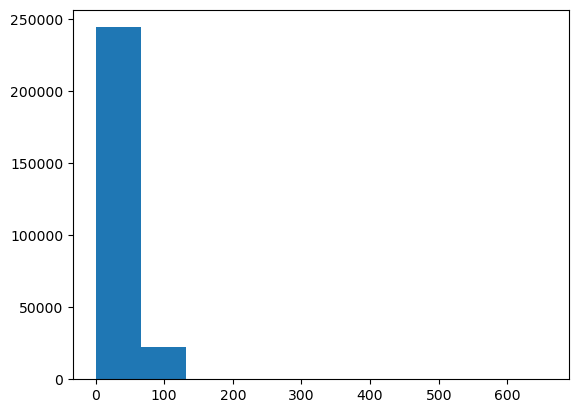

In [79]:
plt.hist(df['fare_amount'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1c23a372f10>,
 'caps': [<matplotlib.lines.Line2D at 0x1c23a380310>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c2390b1e50>],
 'medians': [<matplotlib.lines.Line2D at 0x1c23a381450>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c23a367990>],
 'means': []}

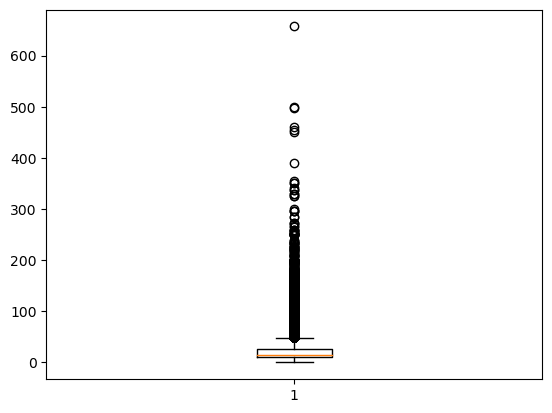

In [80]:
plt.boxplot(df['fare_amount'])

In [81]:
for col in ['fare_amount', 'trip_distance', 'duration']:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    IQR = q3 - q1

    lower_bound = q1 - 1.5 * IQR
    upper_bound = q3 + 1.5 * IQR

    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]


In [82]:
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,Cash,9.3,0.97,8.433333
1,1,Card,7.9,1.10,6.316667
2,1,Card,14.9,2.51,12.750000
4,1,Card,11.4,1.43,10.833333
5,1,Card,12.8,1.84,12.300000
...,...,...,...,...,...
317857,1,Card,15.6,3.50,12.250000
317863,1,Card,10.0,1.60,8.516667
317864,1,Cash,10.0,1.69,7.200000
317866,1,Card,12.1,2.52,7.883333


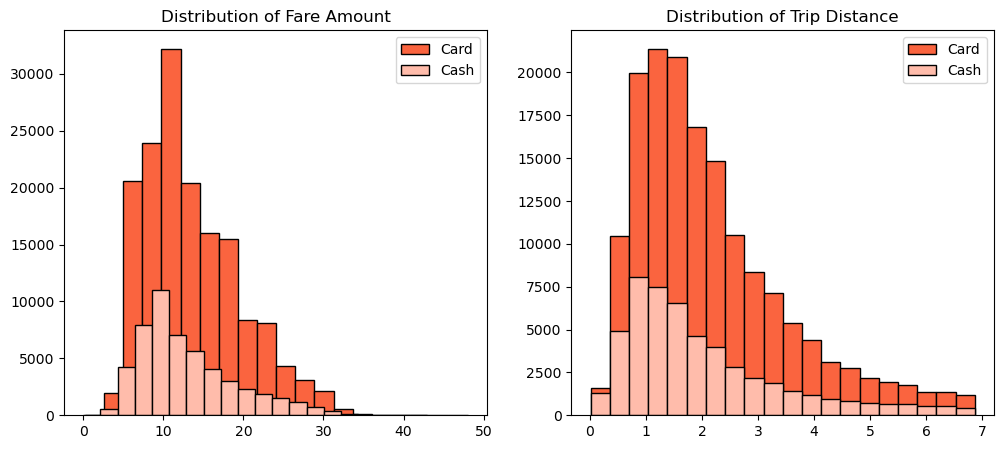

fare_amount           trip_distance          
                    mean       std          mean       std
payment_type                                              
Card           13.605403  5.954195      2.160365  1.365285
Cash           12.960292  6.124883      2.019694  1.440024

In [99]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title('Distribution of Fare Amount')
plt.hist(df[df['payment_type']=='Card']['fare_amount'], histtype='barstacked', bins=20, edgecolor='k', color='#FA643F', label='Card')
plt.hist(df[df['payment_type']=='Cash']['fare_amount'], histtype='barstacked', bins=20, edgecolor='k', color='#FFBCAB',label='Cash')
plt.legend()

plt.subplot(1,2,2)
plt.title('Distribution of Trip Distance')
plt.hist(df[df['payment_type']=='Card']['trip_distance'], histtype='barstacked', bins=20, edgecolor='k', color='#FA643F', label = 'Card')
plt.hist(df[df['payment_type']=='Cash']['trip_distance'], histtype='barstacked', bins=20, edgecolor='k', color='#FFBCAB', label = 'Cash')
plt.legend()
plt.show()

# calculating the mean and standard deviation group by on payment type
df.groupby('payment_type').agg({'fare_amount': ['mean', 'std'], 'trip_distance': ['mean', 'std'],})


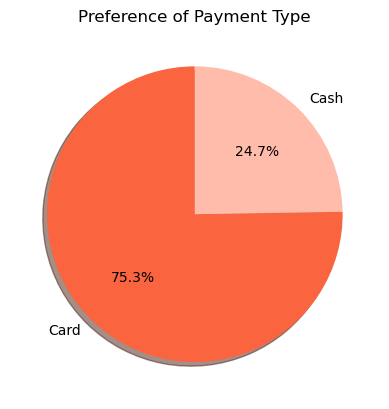

In [84]:
plt.title('Preference of Payment Type')
plt.pie(df['payment_type'].value_counts(normalize=True), 
        labels=df['payment_type'].value_counts().index, 
        startangle=90, shadow=True, autopct='%1.1f%%', 
        colors=['#FA643F', '#FFBCAB'])
plt.show()


In [85]:
passenger_count = df.groupby(['payment_type','passenger_count'])['passenger_count'].count()

# renaming the passenger_count to count to reset the index
passenger_count.rename(columns={'passenger_count': 'count'}, inplace=True)
passenger_count.reset_index(inplace=True)

# calculating the percentage of each passenger count
passenger_count['perc'] = (passenger_count['count'] / passenger_count['count'].sum()) * 100

# creating a new empty dataframe to store the distribution of each payment type (useful for the visualization)
df = pd.DataFrame(columns=['payment_type', 1, 2, 3, 4, 5])
df['payment_type'] = ['Card', 'Cash']
df.loc[0, 1:] = passenger_count.loc[:4, 'perc'].values
df.loc[1, 1:] = passenger_count.loc[5:, 'perc'].values

# plotting
fig, ax = plt.subplots(figsize=(20, 6))
df.plot(x='payment_type', kind='barh', stacked=True, title='', ax=ax, 
        color=['#FA643F', '#FFBCAB', '#CBB3B2', '#F1F1F1', '#F0D9F9'])

# Add percentage text
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.text(x + width / 2,
            y + height / 2,
            '{:.0f}%'.format(width),
            horizontalalignment='center',
            verticalalignment='center')


TypeError: Series.rename() got an unexpected keyword argument 'columns'

### Hypothesis Testing

In order to select the most suitable test for our scenario, our initial step involves evaluating whether the distribution of fare amounts adheres to a normal distribution. While the histogram depicted above suggests otherwise, we will further confirm this by generating a Q-Q plot.

Quantile-quantile (Q-Q) plots can be used to assess whether the fare amount distributions for each payment type are approximately normally distributed. If the data points closely align with the diagonal line in the plot, it suggests that the data follows a normal distribution.

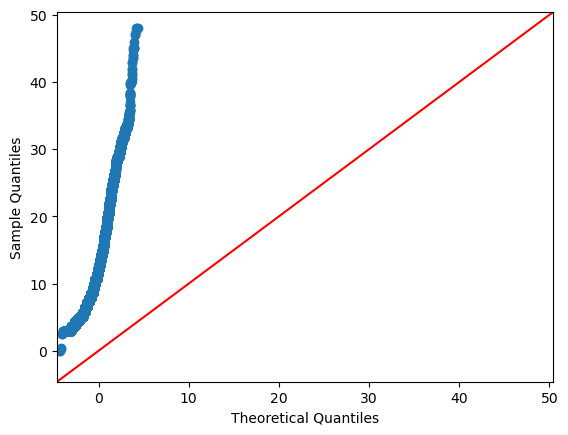

In [90]:
# Create Q-Q plot with 45-degree line added to plot
import statsmodels.api as sm

fig = sm.qqplot(df['fare_amount'], line='45')
plt.show()


##### Null Hypothesis:         
 There is no difference between average fare amount and customers who use cash or cutsomer who use card.

##### Alternate Hypothesis:
 There is difference between average fare amount and customers who use cash or cutsomer who use card.

In [97]:
# Sample 1: Fare amount for credit card payments
credit_card = df[df['payment_type'] == 'Card']['fare_amount']

# Sample 2: Fare amount for cash payments
cash = df[df['payment_type'] == 'Cash']['fare_amount']

# Importing the correct module
import scipy.stats as stats

# Performing the t-test
t_test, p_value = stats.ttest_ind(a=credit_card, b=cash, equal_var=False)

# Printing the results
print("T-Test: ", t_test)
print("P-value: ", p_value)

if p_value < 0.05:
    print("Reject null hypothesis")
else:
    print("Failed to reject null hypothesis")

T-Test:  20.924958223705193
P-value:  5.540065069081722e-97
Reject null hypothesis


In [100]:
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,Cash,9.3,0.97,8.433333
1,1,Card,7.9,1.10,6.316667
2,1,Card,14.9,2.51,12.750000
4,1,Card,11.4,1.43,10.833333
5,1,Card,12.8,1.84,12.300000
...,...,...,...,...,...
317857,1,Card,15.6,3.50,12.250000
317863,1,Card,10.0,1.60,8.516667
317864,1,Cash,10.0,1.69,7.200000
317866,1,Card,12.1,2.52,7.883333


Mean Squared Error: 7.289223705293809
R-squared: 0.7984044869564563


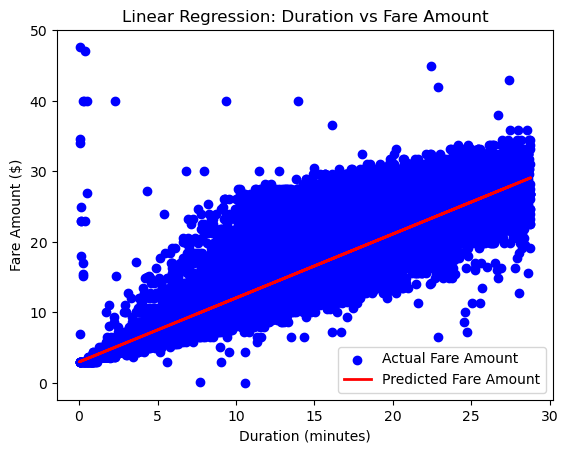

In [101]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


X = df['duration'].values.reshape(-1, 1)  # Independent variable (duration)
y = df['fare_amount'].values  # Dependent variable (fare amount)


# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Create a linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)


# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


# Plot the regression line on the test data
plt.scatter(X_test, y_test, color='blue', label='Actual Fare Amount')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted Fare Amount')
plt.title('Linear Regression: Duration vs Fare Amount')
plt.xlabel('Duration (minutes)')
plt.ylabel('Fare Amount ($)')
plt.legend()
plt.show()
